### 1. ch07.ipynb파일에 존재하는 퍼셉트론 파일을 공부하여 코드를 인용하고 AND, OR 게이트가 생각대로 동작하는지 실행해보고 맞게 동작함을 확인하라.

(colab의 글상자를 이용하여 1번 문제와 답을 명기하라)

In [36]:
#20190320_박요셉
import numpy as np


In [37]:
W, b = np.array([0.5, 0.5]), -0.7

# W : 가중치, x1과 x2의 가중치를 모두 0.5로 부여
# b : 임계값

In [38]:
def perceptron(x1, x2):
    x = np.array([x1, x2])
    tmp = np.sum( W * x ) + b
    if tmp <= 0: return 0 #활성함수 step -> clamp
    else: return 1

In [39]:
print('--- 퍼셉트론으로 구현한 AND 게이트 ---')
for xs in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    y = perceptron(xs[0], xs[1])
    print(xs, ': ', y)

--- 퍼셉트론으로 구현한 AND 게이트 ---
(0, 0) :  0
(0, 1) :  0
(1, 0) :  0
(1, 1) :  1


### 2. ch07.ipynb파일에 존재하는 LAB7-5 파일을 공부하여 코드를 인용하고 XOR 게이트가 학습후 생각대로 동작하는지 실행해보고 맞게 동작함을 확인하라.

(colab의 글상자를 이용하여 2번 문제와 답을 명기하라)

﻿참고로

입력계층의 노드는 x1, x2로 2개

은닉계층의 노드는 h1, h2, h3로 3개

출력계층의 노드는 y1, y2로 2개

입력계층과 은닉계층의 연결강도는 U

은닉계층과 출력걔층의 연결강도는 W임﻿


In [40]:
#20190320_박요셉

import numpy as np
import matplotlib.pyplot as plt

In [41]:
# 2->3->2
U = np.random.rand(2,3)   # 입력계층과 은닉계층의 연결강도 // 2*3 ndarray, 0~1 사이의 난수로 채워진 배열 생성
W = np.random.rand(3,2)   # 은닉계층과 출력계층의 연결강도 
learning_rate = 1.0       # 학습률 

In [42]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
    s = sigmoid(v)
    return s*(1-s)

In [43]:
# numpy.zeros(shape, dtype=float, order='C', *, like=None)
# Return a new array of given shape and type, filled with zeros.


input = np.zeros(2)

# 순전파시 계산될 값들 
h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
# 역전파시 계산될 값들 
h_error, h_delta = np.zeros(3), np.zeros(3)                  

# 순전파시 계산될 값들 
y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
# 역전파시 계산될 값들 
y_error, y_delta = np.zeros(2), np.zeros(2)

순전파시 계산될 값들 : $\mathbf h^{\Sigma} ~ \mathbf h^{\phi} ~ \mathbf h^{{\phi}'}$

역전파시 계산될 값들 : $\mathbf e^h ~ \delta^h$


순전파시 계산될 값들 : $\mathbf y^{\Sigma} ~ \mathbf y^{\phi} ~ \mathbf y^{{\phi}'}$

역전파시 계산될 값들 : $ \mathbf e^y ~ \delta^y $

In [44]:
# x -> hidden
def forward_xh(x):
    global input, h_sum, h_out, h_deriv     # 전역변수를 사용하여 다른 {}에서도 해당 변수를 접근할 수 있도록 함.
    input = x
    h_sum = U.T.dot(input)                 # 은닉층에서 합산된 값 // T(transposed, 전치행렬, 행과 열을 서로 바꿈), dot(dot product, 벡터 내적) // 가중치(U)와 input값(X)을 각각 곱한 후 sum함.
    h_out = sigmoid(h_sum)                 # 은닉층의 활성화 값
    h_deriv = derivative_sigmoid(h_sum)    # 은닉층 활성화 미분치

In [45]:
# hidden -> y
def forward_hy():
    global y_sum, y_out, y_deriv
    y_sum = W.T.dot(h_out)                  # 출력층에서 합산된 값
    y_out = sigmoid(y_sum)                  # 출력층의 활성화 값
    y_deriv = derivative_sigmoid(y_sum)     # 출력층의 활성화 미분치

In [46]:
def compute_error(target):
    return y_out - target                   # 오차의 계산

역전파 계산

In [48]:
# y -> hidden
def backward_y(error):
    global y_error, y_delta, W
    y_error = error                                    # 출력층 오차
    y_delta = y_deriv * y_error                        # 출력층에서 보내는 델타
    ## 연결강도 W 수정
    dW = - learning_rate * np.outer(h_out, y_delta)    # 연결강도 갱신: 은닉층 출력과 출력층 델타의 외적
    W = W + dW   

In [49]:
# hidden -> x
def backward_h():
   global h_error, h_delta, U
   h_error = W.dot(y_delta)                             # 은닉층 오차
   h_delta = h_deriv * h_error                          # 은닉층에서 보내는 델타
   ## 연결강도 U 수정
   dU = - learning_rate * np.outer(input, h_delta)      # 연결강도 갱신
   U = U + dU  

In [52]:
def train(x, target):
    #순전파
    forward_xh(x)
    forward_hy()
    e = compute_error(target)

    #역전파 (가중치 갱신)
    backward_y(e)
    backward_h()
    return e**2 #오차의 제곱

In [53]:
loss = []

for i in range(1000): #1000에폭
    e_accum=0 #오차 제곱의 합
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)    # 훈련 데이터 1     0,0 -> 0    
    e_accum += train(np.array([0,1]), true)     # 훈련 데이터 2     0,1 -> 1
    e_accum += train(np.array([1,0]), true)     # 훈련 데이터 3     1,0 -> 1
    e_accum += train(np.array([1,1]), false)    # 훈련 데이터 4     1,1 -> 0
    loss.append(e_accum)

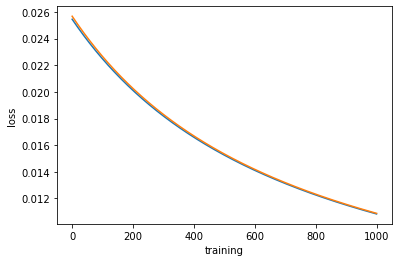

In [54]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

In [55]:
def test(X):
    y_hat = []
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

In [57]:
test(np.array([[0, 0], [0, 1], [1, 0], [1, 1], [0, 0]]))

[array([0.07783769, 0.92200968]),
 array([0.95292284, 0.04717397]),
 array([0.95275983, 0.04733824]),
 array([0.0169909 , 0.98294998]),
 array([0.07783769, 0.92200968])]